# Notes on TAUENN confinement scaling factor optimization

In [1]:
using Revise
using FUSE
using IMAS
using IMASDD
using TAUENN
using Printf
using Plots;
FUSE.logging(Logging.Info);

[ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]


## Load ini and act from FPP v1_demount case

In [2]:
ini, act = FUSE.case_parameters(:FPP, version=:v1_demount, init_from=:scalars);

## Set ini and act parameters

In [3]:
ini.equilibrium.ϵ = 1/3.5
ini.equilibrium.κ = 0.8826 # set less than one so that init uses this as the f_kappa parameter
ini.equilibrium.δ = 0.7
ini.equilibrium.ζ = 0.0

ini.build.plasma_gap = 0.2

ini.core_profiles.impurity = :Kr
ini.core_profiles.n_shaping = 2.5
ini.core_profiles.T_shaping = 2.5
ini.core_profiles.T_ratio = 0.825
ini.core_profiles.greenwald_fraction = 1.0
ini.core_profiles.ne_ped = missing
ini.core_profiles.greenwald_fraction_ped = 0.7
ini.core_profiles.helium_fraction = 0.04

ini.equilibrium.xpoints = :lower
ini.build.divertors = :lower
ini.build.symmetric = false

ini.ec_launchers.power_launched = 55e6

ini.pf_active.n_coils_outside = 8

ini.requirements.flattop_duration = 24*3600.0

86400.0

In [29]:
act.ActorEquilibriumTransport.do_plot = false
act.ActorEquilibriumTransport.max_iter = 1

act.ActorEquilibrium.model = :Solovev
act.ActorEquilibrium.symmetrize = false

act.ActorTauenn.transport_model = :ds03
act.ActorTauenn.confinement_factor = 0.9
act.ActorTauenn.T_shaping = 2.5
act.ActorTauenn.T_ratio_pedestal = 0.825
act.ActorTauenn.error = 1e-4
act.ActorTauenn.eped_only_powerlaw = true # more reliable for broader exploration
act.ActorTauenn.verbose = true

true

## Scan over pressure_core

"Nelder-Mead"

"2.000 KeV ==> cost 1.60e+00"

"3.000 KeV ==> cost 1.58e+00"

"4.000 KeV ==> cost 1.51e+00"

"6.000 KeV ==> cost 1.36e+00"

"9.000 KeV ==> cost 1.15e+00"

"15.000 KeV ==> cost 8.10e-01"

"24.001 KeV ==> cost 5.23e-01"

"42.001 KeV ==> cost 2.38e-01"

"69.002 KeV ==> cost 2.68e-02"

"123.003 KeV ==> cost 4.90e-01"

"96.002 KeV ==> cost 2.59e-01"

"62.252 KeV ==> cost 3.22e-02"

"75.752 KeV ==> cost 8.60e-02"

"67.314 KeV ==> cost 1.27e-02"

"65.627 KeV ==> cost 2.40e-03"

"62.252 KeV ==> cost 3.27e-02"

"63.939 KeV ==> cost 1.76e-02"

"66.048 KeV ==> cost 1.28e-03"

"66.470 KeV ==> cost 5.07e-03"

"65.943 KeV ==> cost 3.99e-04"

"65.838 KeV ==> cost 5.50e-04"

"65.917 KeV ==> cost 1.51e-04"

"65.890 KeV ==> cost 8.16e-05"

"65.838 KeV ==> cost 5.51e-04"

"65.890 KeV ==> cost 8.33e-05"

"65.890 KeV ==> cost 8.22e-05"

 * Status: success

 * Candidate solution
    Final objective value:     8.163981e-05

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-04

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    11
    f(x) calls:    25

method = Optim.NelderMead{Optim.AffineSimplexer, Optim.AdaptiveParameters}(Optim.AffineSimplexer(0.025, 0.5), Optim.AdaptiveParameters(1.0, 1.0, 0.75, 1.0))
initial_x = [2000.0]
minimizer = [65890.26909179689]
minimum = 8.16398051995959e-5
iterations = 11
iteration_converged = false
x_converged = false
x_abstol = 0.0
x_reltol = 0.0
x_abschange = NaN
x_relchange = NaN
f_converged = false
f_abstol = 0.0
f_reltol = 0.0
f_abschange = NaN
f_relchange = NaN
g_converged = true
g_abstol = 0.0001
g_residual = 3.4740393035803674e-5
f_increased = false
f_calls = 25
g_calls = 0
h_calls = 0
ls_success = true
time_limit = NaN
time_run = 0.7486538887023926
stopped_by = (f_limit_reached = false, g_limit_reached = false, 

"Nelder-Mead"

"2.000 KeV ==> cost 4.10e-01"

"3.000 KeV ==> cost 3.71e-01"

"4.000 KeV ==> cost 3.05e-01"

"6.000 KeV ==> cost 1.91e-01"

"9.000 KeV ==> cost 8.82e-02"

"15.000 KeV ==> cost 5.02e-02"

"24.001 KeV ==> cost 4.36e-02"

"42.001 KeV ==> cost 5.41e-02"

"33.001 KeV ==> cost 1.11e-03"

"51.001 KeV ==> cost 1.16e-01"

"42.001 KeV ==> cost 5.50e-02"

"30.751 KeV ==> cost 1.33e-02"

"35.251 KeV ==> cost 1.15e-02"

"33.563 KeV ==> cost 1.81e-03"

"32.438 KeV ==> cost 4.62e-03"

"33.141 KeV ==> cost 7.22e-04"

"33.282 KeV ==> cost 1.10e-04"

"33.563 KeV ==> cost 1.73e-03"

"33.423 KeV ==> cost 9.32e-04"

"33.247 KeV ==> cost 7.71e-05"

"33.247 KeV ==> cost 8.52e-05"

"33.247 KeV ==> cost 8.52e-05"

 * Status: success

 * Candidate solution
    Final objective value:     7.710666e-05

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-04

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    9
    f(x) calls:    21

method = Optim.NelderMead{Optim.AffineSimplexer, Optim.AdaptiveParameters}(Optim.AffineSimplexer(0.025, 0.5), Optim.AdaptiveParameters(1.0, 1.0, 0.75, 1.0))
initial_x = [2000.0]
minimizer = [33246.874902343756]
minimum = 7.710665698046348e-5
iterations = 9
iteration_converged = false
x_converged = false
x_abstol = 0.0
x_reltol = 0.0
x_abschange = NaN
x_relchange = NaN
f_converged = false
f_abstol = 0.0
f_reltol = 0.0
f_abschange = NaN
f_relchange = NaN
g_converged = true
g_abstol = 0.0001
g_residual = 1.6506624068046705e-5
f_increased = false
f_calls = 21
g_calls = 0
h_calls = 0
ls_success = true
time_limit = NaN
time_run = 0.6136150360107422
stopped_by = (f_limit_reached = false, g_limit_reached = false, 

"Nelder-Mead"

"2.000 KeV ==> cost 9.90e-01"

"3.000 KeV ==> cost 1.04e+00"

"1.000 KeV ==> cost 8.93e-01"

"-1.000 KeV ==> cost 8.92e-01"

"-4.000 KeV ==> cost 1.09e+00"

"-0.250 KeV ==> cost 8.17e-01"

"0.500 KeV ==> cost 8.48e-01"

"-0.063 KeV ==> cost 7.36e-01"

"0.125 KeV ==> cost 7.82e-01"

"-0.016 KeV ==> cost 5.55e-01"

"0.031 KeV ==> cost 6.64e-01"

"-0.004 KeV ==> cost 1.91e-01"

"0.008 KeV ==> cost 3.92e-01"

"-0.001 KeV ==> cost 2.10e-01"

"-0.007 KeV ==> cost 3.59e-01"

"-0.003 KeV ==> cost 1.24e-01"

"-0.002 KeV ==> cost 4.02e-02"

"-0.001 KeV ==> cost 2.10e-01"

"-0.002 KeV ==> cost 6.91e-02"

"-0.002 KeV ==> cost 1.55e-02"

"-0.002 KeV ==> cost 1.08e-02"

"-0.002 KeV ==> cost 6.91e-02"

"-0.002 KeV ==> cost 3.90e-02"

"-0.002 KeV ==> cost 4.04e-03"

"-0.002 KeV ==> cost 2.60e-03"

"-0.002 KeV ==> cost 1.55e-02"

"-0.002 KeV ==> cost 9.13e-03"

"-0.002 KeV ==> cost 9.51e-04"

"-0.002 KeV ==> cost 7.05e-04"

"-0.002 KeV ==> cost 4.04e-03"

"-0.002 KeV ==> cost 2.37e-03"

"-0.002 KeV ==> cost 2.91e-04"

"-0.002 KeV ==> cost 1.24e-04"

"-0.002 KeV ==> cost 9.51e-04"

"-0.002 KeV ==> cost 1.24e-04"

"-0.002 KeV ==> cost 1.24e-04"

 * Status: success

 * Candidate solution
    Final objective value:     1.237286e-04

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-04

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    16
    f(x) calls:    35

method = Optim.NelderMead{Optim.AffineSimplexer, Optim.AdaptiveParameters}(Optim.AffineSimplexer(0.025, 0.5), Optim.AdaptiveParameters(1.0, 1.0, 0.75, 1.0))
initial_x = [2000.0]
minimizer = [-2.1996356487276003]
minimum = 0.0001237286142050653
iterations = 16
iteration_converged = false
x_converged = false
x_abstol = 0.0
x_reltol = 0.0
x_abschange = NaN
x_relchange = NaN
f_converged = false
f_abstol = 0.0
f_reltol = 0.0
f_abschange = NaN
f_relchange = NaN
g_converged = true
g_abstol = 0.0001
g_residual = 8.340432012510224e-5
f_increased = false
f_calls = 35
g_calls = 0
h_calls = 0
ls_success = true
time_limit = NaN
time_run = 0.8773229122161865
stopped_by = (f_limit_reached = false, g_limit_reached = fals

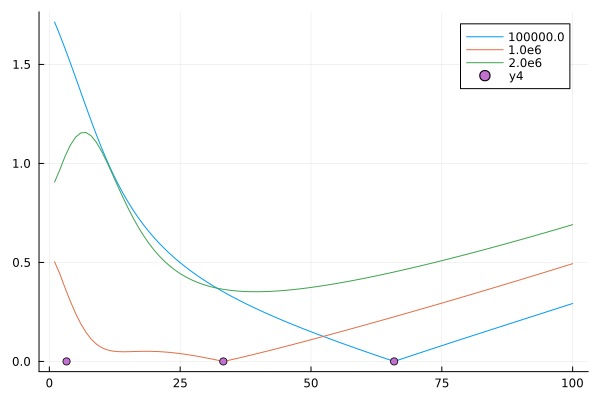

In [33]:
pressure_core_list = [0.1e6, 1.0e6, 2.0e6]
#pressure_core_list = [0.5e6]
dd_list = Vector{Any}([])
err_list = Vector{Any}([])
T0_list = Vector{Any}([])

P = plot()

for pressure_core in pressure_core_list
    ini0 = deepcopy(ini)
    act0 = deepcopy(act)

    ini0.equilibrium.pressure_core = pressure_core

    dd0 = IMAS.dd();

    # run FUSE.init
    FUSE.init(dd0, ini0, act0; do_plot=false);
    # run HCD to get updated current drive
    FUSE.ActorHCD(dd0, act0);
    # evolve j_ohmic
    FUSE.ActorCurrent(dd0, act0);

    # assign TAUENN parameters
    par = act0.ActorTauenn
    parameters = TAUENN.TauennParameters(;
            par.error,
            par.eped_factor,
            par.rho_fluxmatch,
            par.T_shaping,
            par.T_ratio_pedestal,
            par.transport_model,
            par.confinement_factor,
            par.warn_nn_train_bounds,
            par.update_pedestal,
            par.eped_only_powerlaw)

    # define T0 scan
    T0_scan = LinRange(1e3,100e3,100)

    # calculate flux error over T0 scan
    err_scan = []
    for T0 in T0_scan
            err = TAUENN.get_flux_error(dd0, parameters, T0)
            append!(err_scan, [err])
    end
    
    # run tau_enn optimizer
    tauenn_out = TAUENN.tau_enn(dd0, parameters, verbose=true, algorithm=:NelderMead)
    append!(dd_list, [tauenn_out.dd])
    append!(err_list, [tauenn_out.error])
    append!(T0_list, [tauenn_out.dd.core_profiles.profiles_1d[].electrons.temperature[1]])
    
    # plot
    plot!(P,T0_scan/1e3, abs.(err_scan), label=pressure_core)

end

scatter!(P,T0_list/1e3,err_list)

display(P)

In [6]:
dd_list[1].

core_profiles.profiles_1d[].electrons.temperature[1]

53262.375039889936